In [1]:
from zipfile import ZipFile
import os

from google.colab import files
uploaded = files.upload()


dataset_zip = list(uploaded.keys())[0]
extract_path = "/content/renaissance_dataset"
with ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


import os
for root, dirs, files in os.walk(extract_path):
    for f in files:
        print(os.path.join(root, f))


Saving OneDrive_2025-04-07.zip to OneDrive_2025-04-07.zip
/content/renaissance_dataset/Test sources/Paredes - Reglas generales.pdf
/content/renaissance_dataset/Test sources/Buendia - Instruccion.pdf
/content/renaissance_dataset/Test sources/Ezcaray - Vozes.pdf
/content/renaissance_dataset/Test sources/PORCONES.228.35 – 1636.pdf
/content/renaissance_dataset/Test sources/Constituciones sinodales Calahorra 1602.pdf
/content/renaissance_dataset/Test sources/Mendo - Principe perfecto.pdf
/content/renaissance_dataset/Test sources/These files for HANDWRITTEN test ONLY/ES-AHPHU - J-000312-0014 – 1579.pdf
/content/renaissance_dataset/Test sources/These files for HANDWRITTEN test ONLY/J&#x3a;0017&#x3a;03-J&#x3a;0085&#x3a;11 – 1799-1845.pdf


In [3]:
# Install required libraries
!pip install pdf2image
!apt-get install poppler-utils
!pip install ultralytics


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 1s (303 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126213 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
from google.colab import files
uploaded = files.upload()


Saving OneDrive_2025-04-07.zip to OneDrive_2025-04-07 (1).zip


In [6]:
import zipfile
import os

zip_path = list(uploaded.keys())[0]
extract_dir = "/content/data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extracted to:", extract_dir)


Extracted to: /content/data


In [7]:
from pdf2image import convert_from_path

pdf_dir = os.path.join(extract_dir, "Test sources")
output_img_dir = "/content/page_images"
os.makedirs(output_img_dir, exist_ok=True)

for pdf in os.listdir(pdf_dir):
    if not pdf.endswith(".pdf"):
        continue
    full_path = os.path.join(pdf_dir, pdf)
    try:
        pages = convert_from_path(full_path, dpi=300, first_page=1, last_page=3)
        for i, page in enumerate(pages):
            name = pdf.replace(".pdf", f"_page{i+1}.png")
            page.save(os.path.join(output_img_dir, name), "PNG")
        print(f"✅ Converted {pdf}")
    except Exception as e:
        print(f"❌ Failed for {pdf}: {e}")


✅ Converted Paredes - Reglas generales.pdf
✅ Converted Buendia - Instruccion.pdf
✅ Converted Ezcaray - Vozes.pdf
❌ Failed for PORCONES.228.35 – 1636.pdf: Image size (211680000 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
✅ Converted Constituciones sinodales Calahorra 1602.pdf
✅ Converted Mendo - Principe perfecto.pdf


In [9]:
!zip -r /content/page_images.zip /content/page_images
from google.colab import files
files.download('/content/page_images.zip')


updating: content/page_images/ (stored 0%)
updating: content/page_images/Ezcaray - Vozes_page2.png (deflated 1%)
updating: content/page_images/Paredes - Reglas generales_page2.png (deflated 0%)
updating: content/page_images/Constituciones sinodales Calahorra 1602_page3.png (deflated 0%)
updating: content/page_images/Paredes - Reglas generales_page1.png (deflated 0%)
updating: content/page_images/Mendo - Principe perfecto_page3.png (deflated 0%)
updating: content/page_images/Buendia - Instruccion_page3.png (deflated 5%)
updating: content/page_images/Ezcaray - Vozes_page3.png (deflated 1%)
updating: content/page_images/Constituciones sinodales Calahorra 1602_page2.png (deflated 0%)
updating: content/page_images/Buendia - Instruccion_page2.png (deflated 4%)
updating: content/page_images/Constituciones sinodales Calahorra 1602_page1.png (deflated 0%)
updating: content/page_images/Buendia - Instruccion_page1.png (deflated 6%)
updating: content/page_images/Ezcaray - Vozes_page1.png (deflated

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Uploading Roboflow YOLOv8 .zip

In [10]:
from google.colab import files
uploaded = files.upload()


Saving Historical Layout Text.v1i.yolov8.zip to Historical Layout Text.v1i.yolov8.zip


In [11]:
!pip install ultralytics



# Check extracted files

In [12]:
import zipfile

zip_path = "/content/Historical Layout Text.v1i.yolov8.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

import os
os.listdir(extract_path)


['train', 'README.dataset.txt', 'README.roboflow.txt', 'data.yaml']

# Copy training images and labels to validation

In [14]:
import shutil
import os


os.makedirs("/content/dataset/valid/images", exist_ok=True)
os.makedirs("/content/dataset/valid/labels", exist_ok=True)


train_images = "/content/dataset/train/images"
train_labels = "/content/dataset/train/labels"
val_images = "/content/dataset/valid/images"
val_labels = "/content/dataset/valid/labels"


for fname in os.listdir(train_images):
    shutil.copy(os.path.join(train_images, fname), val_images)

for fname in os.listdir(train_labels):
    shutil.copy(os.path.join(train_labels, fname), val_labels)

print("✅ Validation set created by copying training data.")


✅ Validation set created by copying training data.


In [15]:
from ultralytics import YOLO

model = YOLO("yolov8n.yaml")

results = model.train(
    data="/content/dataset/data.yaml",
    epochs=30,
    imgsz=640,
    batch=4,
    name="layout_model"
)


Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/dataset/data.yaml, epochs=30, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=layout_model2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<00:00, 1507.35it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<00:00, 2852.16it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/layout_model2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/layout_model2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      2.858      3.568      4.324          8        640: 100%|██████████| 2/2 [00:08<00:00,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all          7          8    0.00286       0.75     0.0112    0.00655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      2.942      3.312      4.369         14        640: 100%|██████████| 2/2 [00:06<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all          7          8    0.00286       0.75     0.0195    0.00905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      2.682      3.366      4.393          9        640: 100%|██████████| 2/2 [00:05<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]

                   all          7          8    0.00286       0.75     0.0215     0.0104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      3.325      3.382      4.282         13        640: 100%|██████████| 2/2 [00:05<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]

                   all          7          8    0.00286       0.75     0.0867     0.0362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      3.255      3.238      4.283         12        640: 100%|██████████| 2/2 [00:06<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]

                   all          7          8    0.00286       0.75     0.0542     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      3.317      3.372       4.29         13        640: 100%|██████████| 2/2 [00:05<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]

                   all          7          8    0.00286       0.75     0.0542     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      3.202      3.173      4.338          8        640: 100%|██████████| 2/2 [00:05<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

                   all          7          8    0.00286       0.75      0.144     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      3.163      3.973      4.285          3        640: 100%|██████████| 2/2 [00:06<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all          7          8    0.00286       0.75      0.215     0.0577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      3.578      3.391      4.245          7        640: 100%|██████████| 2/2 [00:05<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]

                   all          7          8    0.00286       0.75      0.215     0.0577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      3.217       3.14      4.328          8        640: 100%|██████████| 2/2 [00:05<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all          7          8    0.00286       0.75     0.0975     0.0418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      2.987      3.142      4.255         10        640: 100%|██████████| 2/2 [00:06<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]

                   all          7          8    0.00286       0.75     0.0975     0.0418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      2.619      3.422      4.252          4        640: 100%|██████████| 2/2 [00:05<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]

                   all          7          8    0.00286       0.75      0.142     0.0447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      3.445      3.436      4.215          8        640: 100%|██████████| 2/2 [00:05<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all          7          8    0.00286       0.75      0.142     0.0447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      2.623      3.084      4.132          9        640: 100%|██████████| 2/2 [00:06<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

                   all          7          8    0.00286       0.75      0.142     0.0447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      3.069      3.291      4.277          9        640: 100%|██████████| 2/2 [00:05<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]

                   all          7          8    0.00286       0.75     0.0629     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      3.156       3.15      4.137         10        640: 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all          7          8    0.00286       0.75     0.0629     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      2.984      3.214      4.191          7        640: 100%|██████████| 2/2 [00:06<00:00,  3.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

                   all          7          8    0.00286       0.75     0.0629     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      2.987      3.116      4.146         10        640: 100%|██████████| 2/2 [00:05<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all          7          8    0.00286       0.75     0.0608     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      2.469      3.425      4.219          5        640: 100%|██████████| 2/2 [00:06<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all          7          8    0.00286       0.75     0.0608     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      3.293      3.445      4.144          5        640: 100%|██████████| 2/2 [00:06<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all          7          8    0.00286       0.75     0.0608     0.0163


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      2.411      3.586      4.194          3        640: 100%|██████████| 2/2 [00:05<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all          7          8    0.00286       0.75     0.0595     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      2.574      3.383      4.142          4        640: 100%|██████████| 2/2 [00:06<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all          7          8    0.00286       0.75     0.0595     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      2.455      3.584      4.141          3        640: 100%|██████████| 2/2 [00:05<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]

                   all          7          8    0.00286       0.75     0.0595     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      2.937      3.708      4.193          3        640: 100%|██████████| 2/2 [00:05<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

                   all          7          8    0.00286       0.75     0.0595     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      2.541      3.527       4.12          4        640: 100%|██████████| 2/2 [00:06<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

                   all          7          8    0.00286       0.75     0.0702     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G      2.575      3.843      4.196          4        640: 100%|██████████| 2/2 [00:05<00:00,  2.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]

                   all          7          8    0.00286       0.75     0.0702     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      2.541      3.569      4.171          3        640: 100%|██████████| 2/2 [00:05<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

                   all          7          8    0.00286       0.75     0.0702     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G      3.025      3.528      4.122          4        640: 100%|██████████| 2/2 [00:06<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]

                   all          7          8    0.00286       0.75     0.0702     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      2.713      3.446      4.185          4        640: 100%|██████████| 2/2 [00:05<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]

                   all          7          8    0.00286       0.75     0.0702     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G      2.728      3.394      4.169          4        640: 100%|██████████| 2/2 [00:05<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all          7          8    0.00286       0.75     0.0563     0.0139



30 epochs completed in 0.072 hours.
Optimizer stripped from runs/detect/layout_model2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/layout_model2/weights/best.pt, 6.2MB

Validating runs/detect/layout_model2/weights/best.pt...
Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


                   all          7          8    0.00286       0.75      0.176     0.0443
Speed: 4.6ms preprocess, 232.5ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/layout_model2


# List files in train images folder

In [17]:
import os


image_folder = "/content/dataset/train/images"
image_files = os.listdir(image_folder)


sample_image_path = os.path.join(image_folder, image_files[0])
print("Using this image for prediction:", sample_image_path)


Using this image for prediction: /content/dataset/train/images/Constituciones-sinodales-Calahorra-1602_page3_png.rf.abd42a513ebf4b19a6d927d17c385eca.jpg


In [18]:
from ultralytics import YOLO

model = YOLO("runs/detect/layout_model2/weights/best.pt")

results = model.predict(source=sample_image_path, save=True, conf=0.25)



image 1/1 /content/dataset/train/images/Constituciones-sinodales-Calahorra-1602_page3_png.rf.abd42a513ebf4b19a6d927d17c385eca.jpg: 640x640 (no detections), 234.1ms
Speed: 4.9ms preprocess, 234.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


In [20]:
from ultralytics import YOLO

model = YOLO("runs/detect/layout_model2/weights/best.pt")

results = model.predict(source="/content/dataset/train/images/Buendia-Instruccion_page1_png.rf.4be1e8052c327b6743c9574a82f9ffdd.jpg", save=True, conf=0.25)



image 1/1 /content/dataset/train/images/Buendia-Instruccion_page1_png.rf.4be1e8052c327b6743c9574a82f9ffdd.jpg: 640x640 (no detections), 227.4ms
Speed: 3.7ms preprocess, 227.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


In [21]:
results = model.predict(source=sample_image_path, save=True, conf=0.05)



image 1/1 /content/dataset/train/images/Constituciones-sinodales-Calahorra-1602_page3_png.rf.abd42a513ebf4b19a6d927d17c385eca.jpg: 640x640 (no detections), 230.8ms
Speed: 6.7ms preprocess, 230.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


In [23]:
import os

image_dir = "/content/dataset/train/images"
images = os.listdir(image_dir)

for img in images:
    print(img)


Constituciones-sinodales-Calahorra-1602_page3_png.rf.abd42a513ebf4b19a6d927d17c385eca.jpg
Buendia-Instruccion_page3_png.rf.231a295737a95df2ebed3d6e67279e21.jpg
Buendia-Instruccion_page1_png.rf.4be1e8052c327b6743c9574a82f9ffdd.jpg
Ezcaray-Vozes_page1_png.rf.a14f6a9b200b757be58cb2094779faf9.jpg
Ezcaray-Vozes_page2_png.rf.e0004fa2d7e5a5313bd4af0729c2c54e.jpg
Constituciones-sinodales-Calahorra-1602_page1_png.rf.782a85be3194bc6656d7319d53763c8f.jpg
Constituciones-sinodales-Calahorra-1602_page2_png.rf.482813ab084015a15e4caece10e8812b.jpg


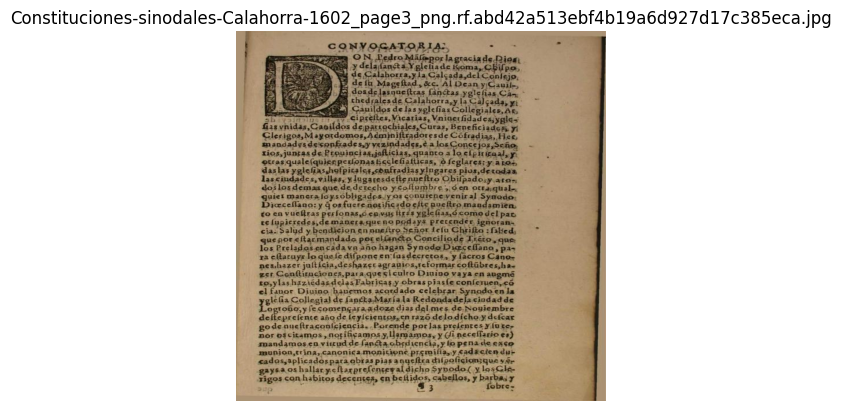

In [24]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/dataset/train/images/" + images[0]  # view the first image
img = Image.open(img_path)
plt.imshow(img)
plt.title(images[0])
plt.axis('off')
plt.show()


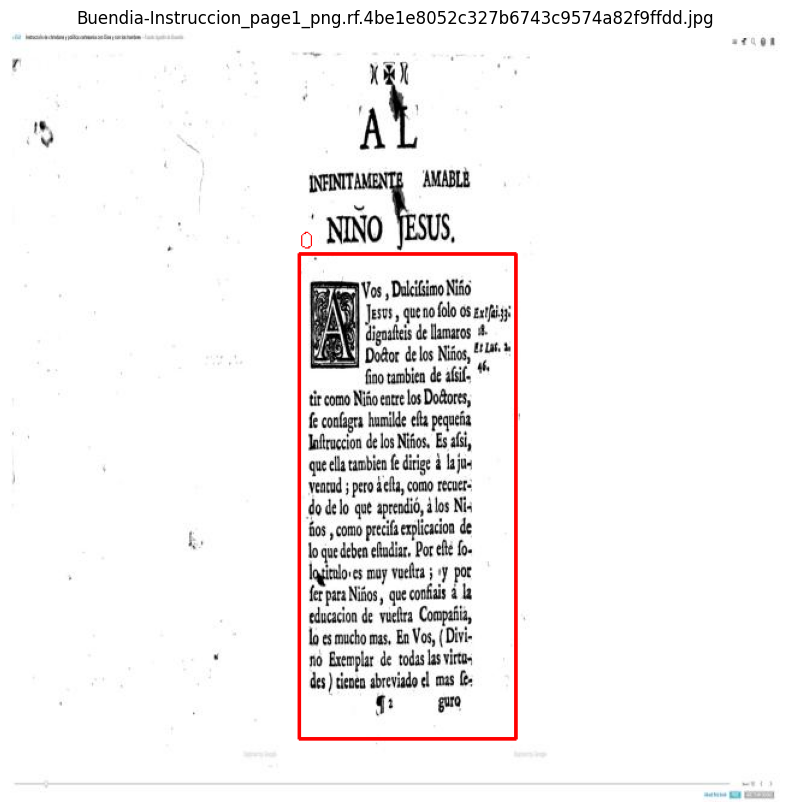

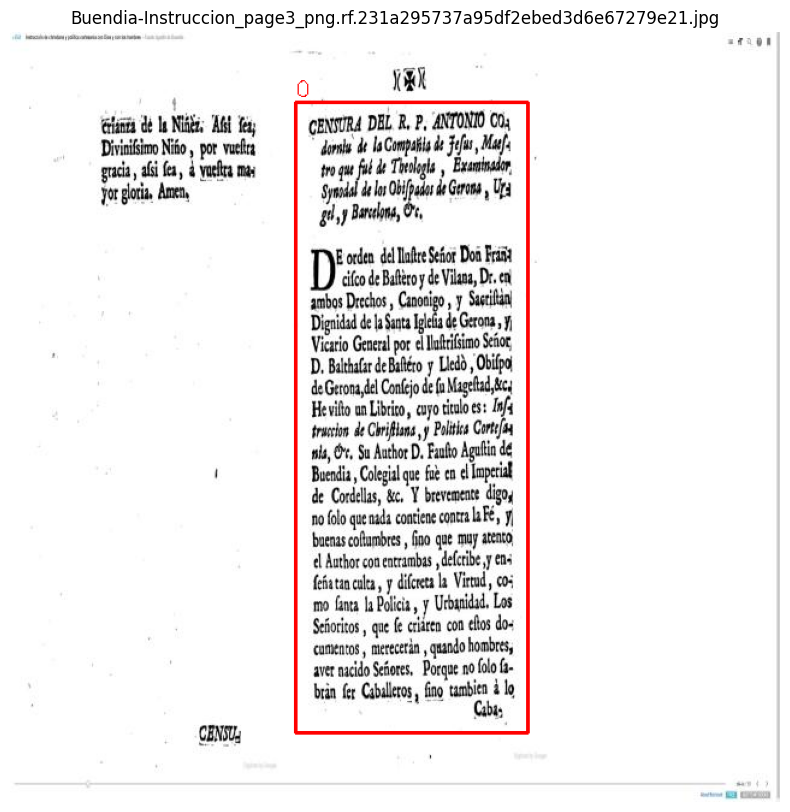

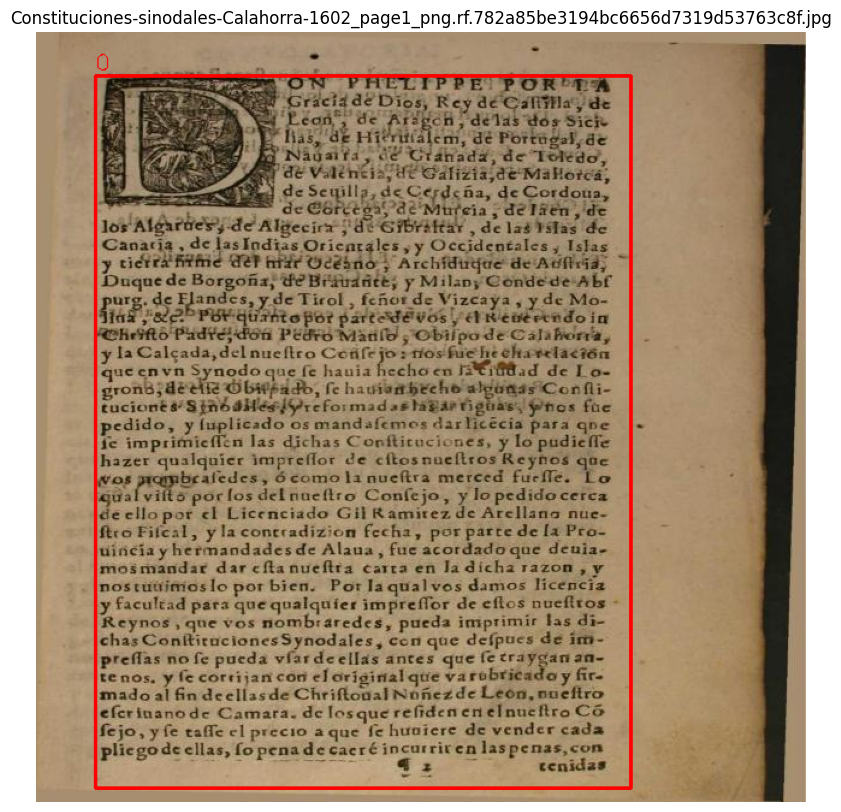

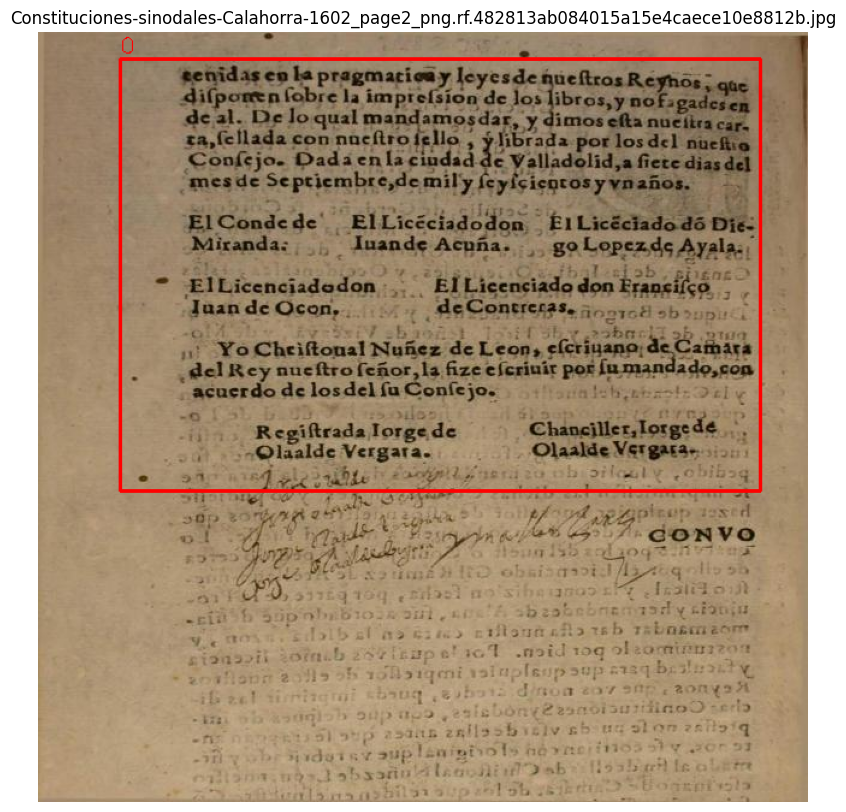

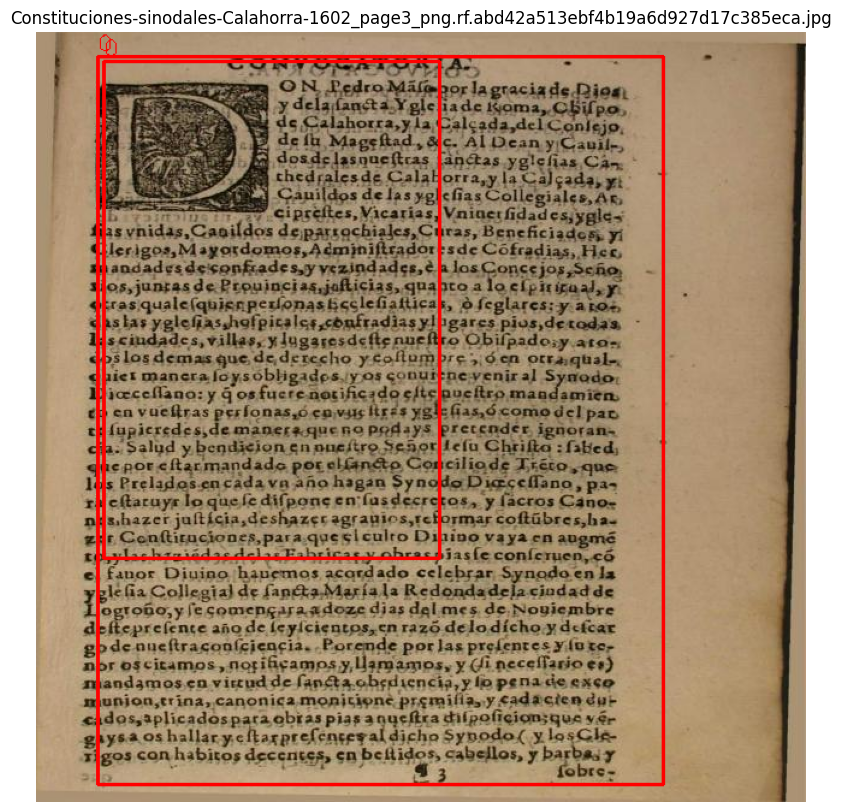

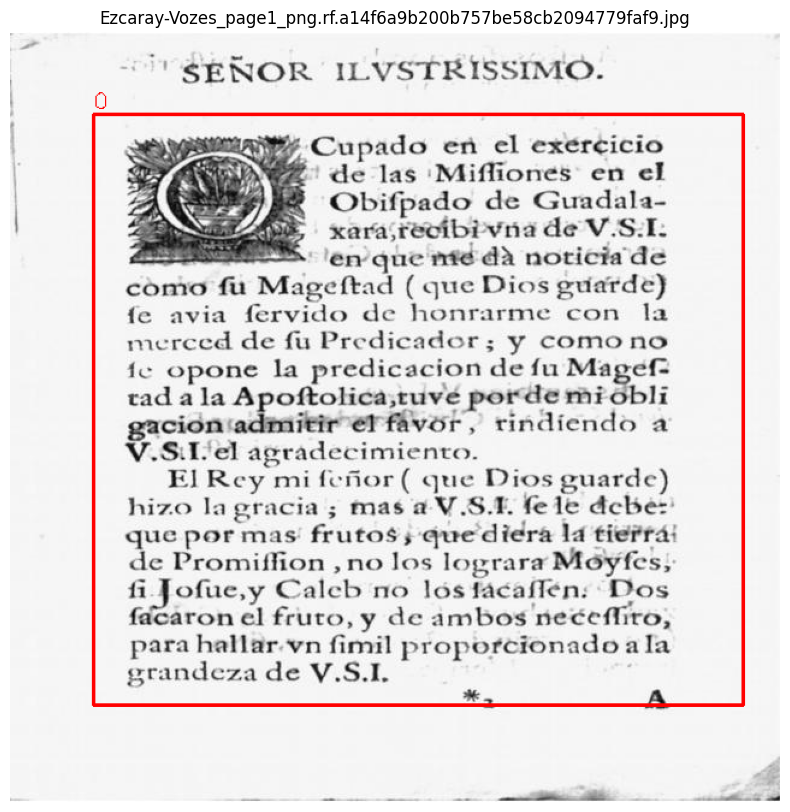

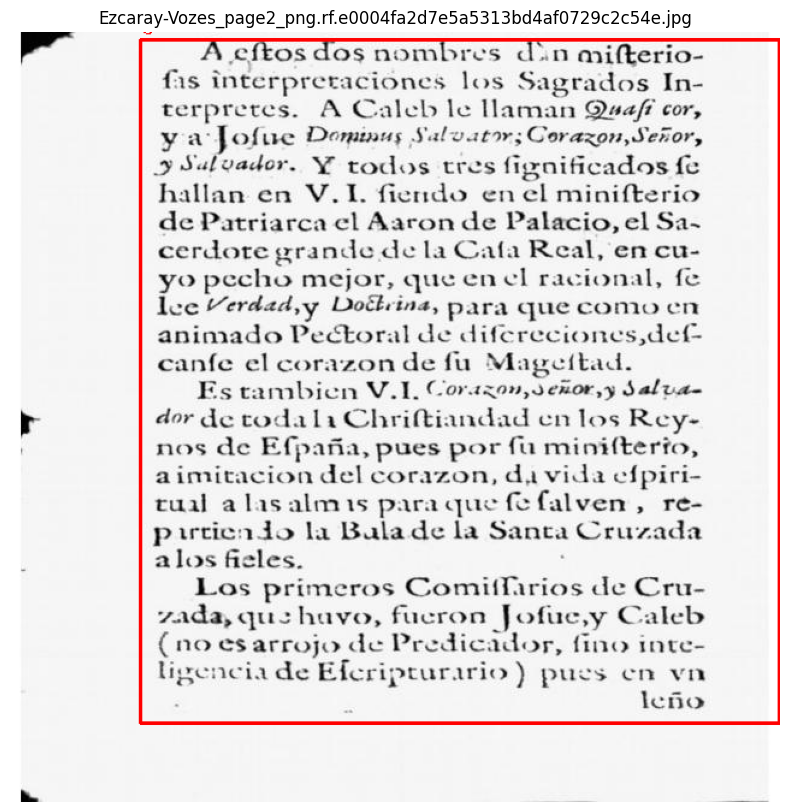

In [25]:
import os
import cv2
import matplotlib.pyplot as plt

# List of image paths
image_paths = [
    "/content/dataset/train/images/Buendia-Instruccion_page1_png.rf.4be1e8052c327b6743c9574a82f9ffdd.jpg",
    "/content/dataset/train/images/Buendia-Instruccion_page3_png.rf.231a295737a95df2ebed3d6e67279e21.jpg",
    "/content/dataset/train/images/Constituciones-sinodales-Calahorra-1602_page1_png.rf.782a85be3194bc6656d7319d53763c8f.jpg",
    "/content/dataset/train/images/Constituciones-sinodales-Calahorra-1602_page2_png.rf.482813ab084015a15e4caece10e8812b.jpg",
    "/content/dataset/train/images/Constituciones-sinodales-Calahorra-1602_page3_png.rf.abd42a513ebf4b19a6d927d17c385eca.jpg",
    "/content/dataset/train/images/Ezcaray-Vozes_page1_png.rf.a14f6a9b200b757be58cb2094779faf9.jpg",
    "/content/dataset/train/images/Ezcaray-Vozes_page2_png.rf.e0004fa2d7e5a5313bd4af0729c2c54e.jpg"
]


for img_path in image_paths:
    label_path = img_path.replace('/images/', '/labels/').replace('.jpg', '.txt')

    # Load image
    image = cv2.imread(img_path)
    if image is None:
        print(f"Could not load image: {img_path}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape


    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                cls, x, y, bw, bh = map(float, line.strip().split())
                # Convert YOLO format to pixel coordinates
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, str(int(cls)), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 1)
    else:
        print(f"No label found for: {img_path}")


    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
    plt.show()


Processing: /content/dataset/train/images/Constituciones-sinodales-Calahorra-1602_page3_png.rf.abd42a513ebf4b19a6d927d17c385eca.jpg

image 1/1 /content/dataset/train/images/Constituciones-sinodales-Calahorra-1602_page3_png.rf.abd42a513ebf4b19a6d927d17c385eca.jpg: 640x640 (no detections), 236.9ms
Speed: 4.2ms preprocess, 236.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/annotated_images/predict
0 label saved to /content/annotated_images/predict/labels


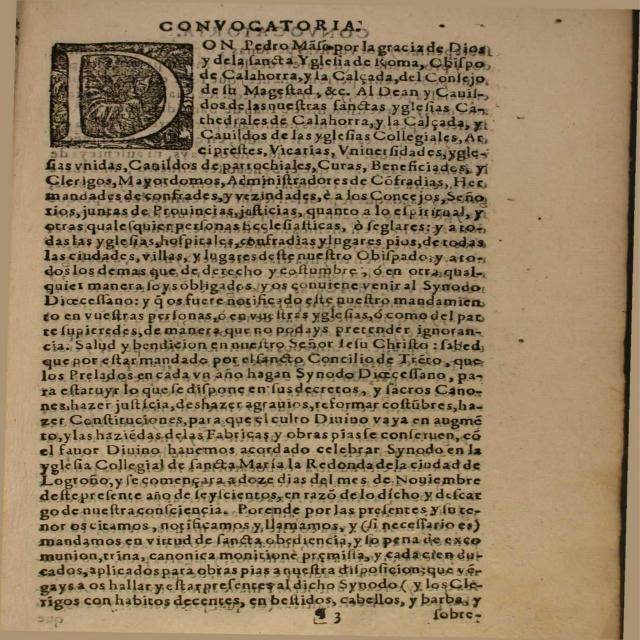

Processing: /content/dataset/train/images/Buendia-Instruccion_page3_png.rf.231a295737a95df2ebed3d6e67279e21.jpg

image 1/1 /content/dataset/train/images/Buendia-Instruccion_page3_png.rf.231a295737a95df2ebed3d6e67279e21.jpg: 640x640 (no detections), 226.2ms
Speed: 4.1ms preprocess, 226.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/annotated_images/predict2
0 label saved to /content/annotated_images/predict2/labels


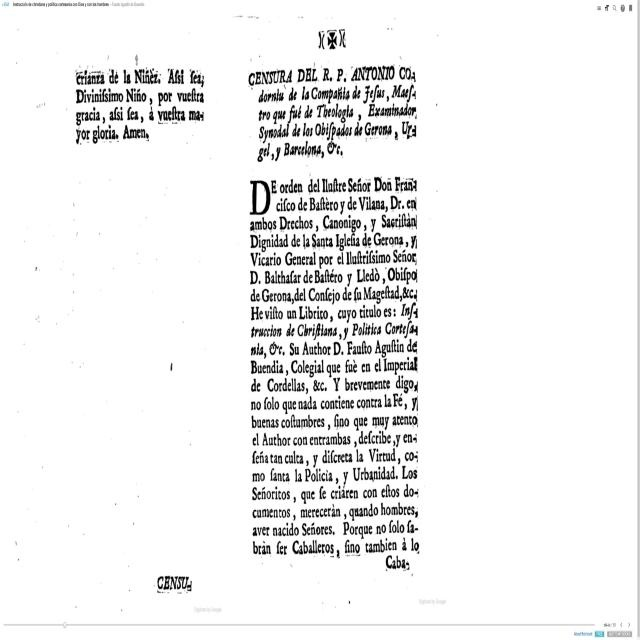

Processing: /content/dataset/train/images/Buendia-Instruccion_page1_png.rf.4be1e8052c327b6743c9574a82f9ffdd.jpg

image 1/1 /content/dataset/train/images/Buendia-Instruccion_page1_png.rf.4be1e8052c327b6743c9574a82f9ffdd.jpg: 640x640 (no detections), 223.2ms
Speed: 4.0ms preprocess, 223.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/annotated_images/predict3
0 label saved to /content/annotated_images/predict3/labels


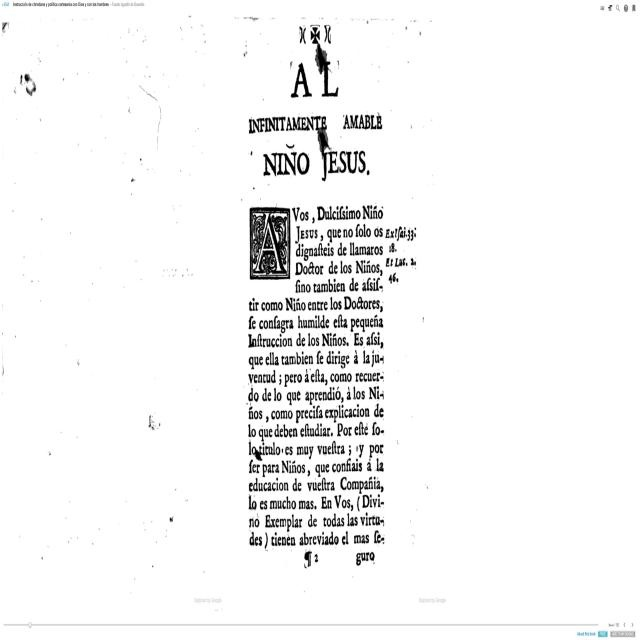

Processing: /content/dataset/train/images/Ezcaray-Vozes_page1_png.rf.a14f6a9b200b757be58cb2094779faf9.jpg

image 1/1 /content/dataset/train/images/Ezcaray-Vozes_page1_png.rf.a14f6a9b200b757be58cb2094779faf9.jpg: 640x640 (no detections), 231.3ms
Speed: 4.0ms preprocess, 231.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/annotated_images/predict4
0 label saved to /content/annotated_images/predict4/labels


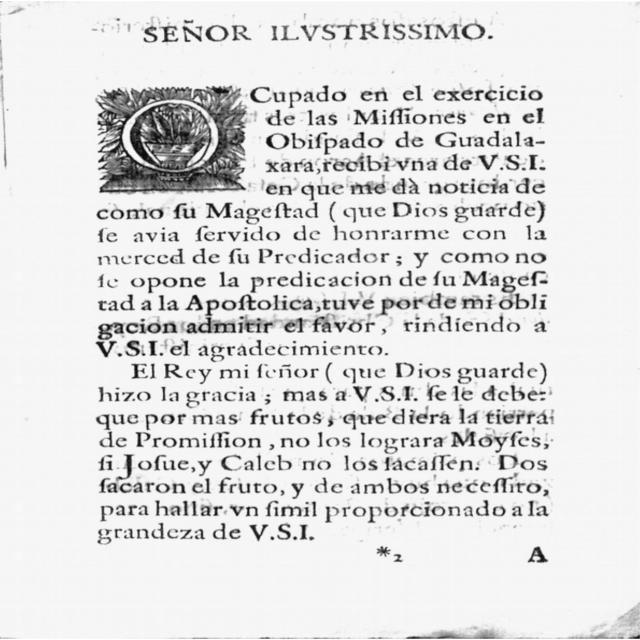

Processing: /content/dataset/train/images/Ezcaray-Vozes_page2_png.rf.e0004fa2d7e5a5313bd4af0729c2c54e.jpg

image 1/1 /content/dataset/train/images/Ezcaray-Vozes_page2_png.rf.e0004fa2d7e5a5313bd4af0729c2c54e.jpg: 640x640 (no detections), 244.2ms
Speed: 4.6ms preprocess, 244.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/annotated_images/predict5
0 label saved to /content/annotated_images/predict5/labels


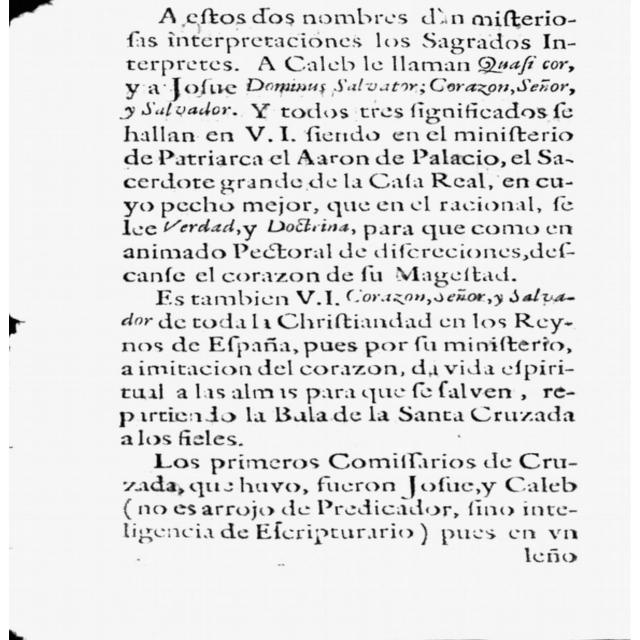

Processing: /content/dataset/train/images/Constituciones-sinodales-Calahorra-1602_page1_png.rf.782a85be3194bc6656d7319d53763c8f.jpg

image 1/1 /content/dataset/train/images/Constituciones-sinodales-Calahorra-1602_page1_png.rf.782a85be3194bc6656d7319d53763c8f.jpg: 640x640 (no detections), 236.3ms
Speed: 4.0ms preprocess, 236.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/annotated_images/predict6
0 label saved to /content/annotated_images/predict6/labels


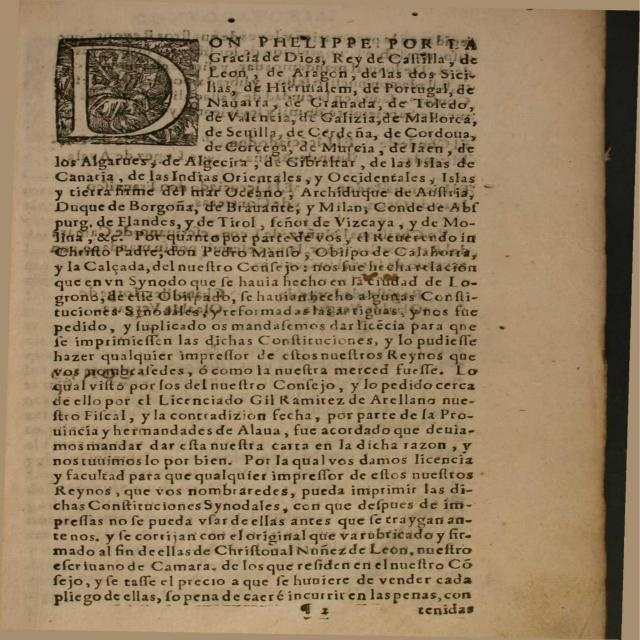

Processing: /content/dataset/train/images/Constituciones-sinodales-Calahorra-1602_page2_png.rf.482813ab084015a15e4caece10e8812b.jpg

image 1/1 /content/dataset/train/images/Constituciones-sinodales-Calahorra-1602_page2_png.rf.482813ab084015a15e4caece10e8812b.jpg: 640x640 (no detections), 251.5ms
Speed: 4.3ms preprocess, 251.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/annotated_images/predict7
0 label saved to /content/annotated_images/predict7/labels


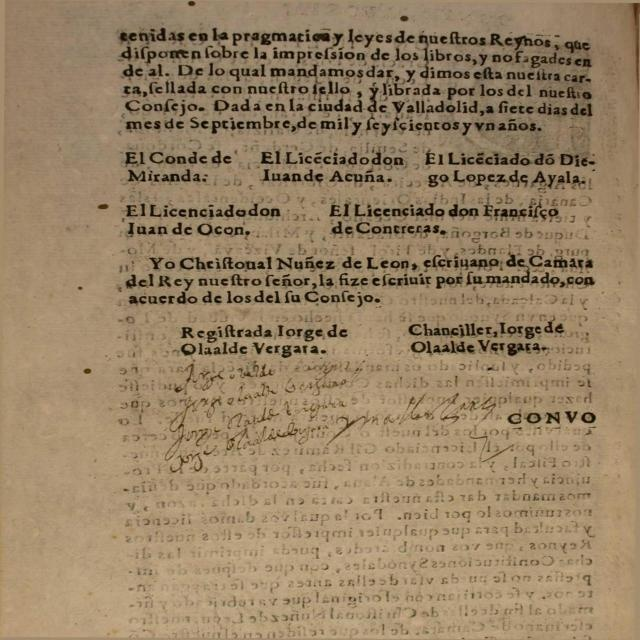

In [29]:
from ultralytics import YOLO
import os
from IPython.display import Image, display


model = YOLO("/content/runs/detect/layout_model2/weights/best.pt")  # or use last.pt if needed

# Image folder
image_dir = "/content/dataset/train/images"
output_dir = "/content/annotated_images"
os.makedirs(output_dir, exist_ok=True)

image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".jpg")]
for img_path in image_files:
    print(f"Processing: {img_path}")
    results = model.predict(source=img_path, save=True, save_txt=True, conf=0.25, project=output_dir, name="predict")

    display(Image(filename=os.path.join(results[0].save_dir, os.path.basename(img_path))))


In [30]:
import cv2
import os

# Directories
images_dir = "/content/dataset/train/images"
labels_dir = "/content/annotated_images/predict/labels"
output_crop_dir = "/content/cropped_layouts"
os.makedirs(output_crop_dir, exist_ok=True)


for label_file in os.listdir(labels_dir):
    if label_file.endswith(".txt"):
        image_file = label_file.replace(".txt", ".jpg")
        image_path = os.path.join(images_dir, image_file)
        label_path = os.path.join(labels_dir, label_file)

        # Read image
        img = cv2.imread(image_path)
        h, w, _ = img.shape

        with open(label_path, "r") as f:
            for i, line in enumerate(f.readlines()):
                parts = line.strip().split()
                cls, cx, cy, bw, bh = map(float, parts)


                x1 = int((cx - bw / 2) * w)
                y1 = int((cy - bh / 2) * h)
                x2 = int((cx + bw / 2) * w)
                y2 = int((cy + bh / 2) * h)

                cropped = img[y1:y2, x1:x2]
                crop_path = os.path.join(output_crop_dir, f"{image_file[:-4]}_crop{i}.jpg")
                cv2.imwrite(crop_path, cropped)

print("✅ Cropped layout regions saved to:", output_crop_dir)


✅ Cropped layout regions saved to: /content/cropped_layouts


In [31]:
!apt install tesseract-ocr -y
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (15.5 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 126243 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [32]:
import pytesseract
from PIL import Image
import glob


cropped_dir = "/content/cropped_layouts"
ocr_output_dir = "/content/ocr_texts"
os.makedirs(ocr_output_dir, exist_ok=True)


for image_path in glob.glob(f"{cropped_dir}/*.jpg"):
    img = Image.open(image_path)
    text = pytesseract.image_to_string(img, lang='spa')  # 'spa' for Spanish

    base_name = os.path.basename(image_path).replace(".jpg", ".txt")
    with open(os.path.join(ocr_output_dir, base_name), "w", encoding="utf-8") as f:
        f.write(text)

print("✅ OCR completed. Text files saved to:", ocr_output_dir)


✅ OCR completed. Text files saved to: /content/ocr_texts


In [35]:
import glob

cropped_images = glob.glob("/content/cropped_layouts/*.jpg")
print("Number of cropped layout images found:", len(cropped_images))
print("Sample files:", cropped_images[:3])


Number of cropped layout images found: 0
Sample files: []


In [36]:
from PIL import Image


img_path = "/content/dataset/train/images/Buendia-Instruccion_page1_png.rf.4be1e8052c327b6743c9574a82f9ffdd.jpg"
img = Image.open(img_path)


cropped = img.crop((50, 100, 550, 600))


cropped_path = "/content/manual_crop.jpg"
cropped.save(cropped_path)
cropped.show()


In [38]:
!mkdir -p /usr/share/tesseract-ocr/4.00/tessdata/
!wget -O /usr/share/tesseract-ocr/4.00/tessdata/spa.traineddata https://github.com/tesseract-ocr/tessdata/raw/master/spa.traineddata


--2025-04-07 08:20:45--  https://github.com/tesseract-ocr/tessdata/raw/master/spa.traineddata
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-07 08:20:45 ERROR 404: Not Found.



In [39]:
import os
os.environ["TESSDATA_PREFIX"] = "/usr/share/tesseract-ocr/4.00/tessdata/"


In [41]:
!rm -rf /usr/share/tesseract-ocr/4.00/tessdata


In [42]:
!mkdir -p /usr/share/tesseract-ocr/4.00/tessdata
!wget -O /usr/share/tesseract-ocr/4.00/tessdata/spa.traineddata https://github.com/tesseract-ocr/tessdata/raw/main/spa.traineddata


--2025-04-07 08:23:18--  https://github.com/tesseract-ocr/tessdata/raw/main/spa.traineddata
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/spa.traineddata [following]
--2025-04-07 08:23:18--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/spa.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18256019 (17M) [application/octet-stream]
Saving to: ‘/usr/share/tesseract-ocr/4.00/tessdata/spa.traineddata’

/usr/share/tesserac 100%[===================>]  17.41M  --.-KB/s    in 0.1s    

2025-04-07 08:23:19 (141 MB/s) - ‘/usr/share/tesseract-ocr/4.00

In [43]:
import pytesseract
from PIL import Image

cropped_path = "/content/manual_crop.jpg"  # Make sure this image exists!
text = pytesseract.image_to_string(Image.open(cropped_path), lang='spa')
print("OCR Result:\n", text)


OCR Result:
 ANFINTT! AVABLE
“ NINO JESUS,
v…,m¡&¡mnmlfan
os, queno oo s ey
%Jgndkkdzlluwm 4
Dodor de ls Niños, 05
finotambien de al *
uircomo Niñoeaue ls Dodors
fecmfgr hmide la peuña
Tnfruconde ls Miños, E l,
eel tambin f dirie d laoe
vend ; pro del como rr
dodelo qe aprri, ios Nis
dos,comoprecerlacion de
louedben hu Por f f-
Iagnoesmoy vc ; y por
$uum. oeo 4 l
educcn de melra Compña,
lo esmucho mas, En Vos, (Divi-
o Brmplar de tods ls vi
des)tiene abrevido el mas E
s m

É

al
MN

A

 



In [44]:
from PIL import Image
import pytesseract
import os

# Directory where YOLOv8 layout cropped images are saved
cropped_dir = "/content/cropped_layouts"  # or wherever your crops are saved

# Output directory
ocr_output_dir = "/content/ocr_outputs"
os.makedirs(ocr_output_dir, exist_ok=True)

# Set language model path again
os.environ["TESSDATA_PREFIX"] = "/usr/share/tesseract-ocr/4.00/tessdata/"

# Loop through each cropped image
for file in os.listdir(cropped_dir):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(cropped_dir, file)
        try:
            text = pytesseract.image_to_string(Image.open(image_path), lang='spa')
            with open(os.path.join(ocr_output_dir, file + ".txt"), "w", encoding='utf-8') as out_f:
                out_f.write(text)
        except Exception as e:
            print


In [46]:
from zipfile import ZipFile
import os

zip_path = "/content/renai_layout_ocr_project.zip"

with ZipFile(zip_path, 'w') as zipf:
    # Add cropped image
    if os.path.exists("/content/manual_crop.jpg"):
        zipf.write("/content/manual_crop.jpg", arcname="manual_crop.jpg")

    # Add YOLOv8 results
    for root, dirs, files in os.walk("/content/runs"):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, "/content")  # maintain structure inside ZIP
            zipf.write(file_path, arcname=arcname)

    # Add OCR output folder if exists
    if os.path.exists("/content/ocr_output"):
        for root, dirs, files in os.walk("/content/ocr_output"):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, "/content")
                zipf.write(file_path, arcname=arcname)

print(f"✅ Zipped successfully to {zip_path}")


✅ Zipped successfully to /content/renai_layout_ocr_project.zip
